In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, LeaveOneOut, train_test_split
from sklearn import neighbors
from sklearn import tree, metrics, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt

# Data Preprocessing

In [22]:
# load data as dataframe just to view
data = load_breast_cancer(as_frame=True)
data.data.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# view features and quantity
print(data['feature_names'])
print("number of features:", len(data['feature_names']))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
number of features: 30


In [24]:
# load data as numpy array for processing
X, y = load_breast_cancer(return_X_y=True)

# split data into training and testing sets, for Decision Tree (DT) and Random Forest (RF)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# scale feature data for K-Nearest Neighbor (KNN) training and testing
scaler = StandardScaler() # scaler object
scaler.fit(X) # compute mean and std for each column
Xs = scaler.transform(X) # create centered and scaled data with same distribution

# split scaled data into training and testing sets for KNN
Xs_train, Xs_test = train_test_split(Xs, test_size=0.2)

# Model Training
This section will just include only one instance of training/test per model using the default/given hyperparameter settings. See ["Ablation Study"](#ablation-study) section for experiments testing different hyperparameter settings.

In [26]:
# train KNN with default parameters

# default hyperparameters:
k = 5 # default number of neighbors
p = 2 # default distance metric (L2)

# train and test KNN with default parameters
model_knn_default = neighbors.KNeighborsClassifier(n_neighbors=k, p=p)
model_knn_default.fit(Xs_train, y_train) # use scaled feature data
y_predict_knn_default = model_knn_default.predict(Xs_test) # use scaled feature data

In [27]:
# train DT with default parameters

# default hyperparameters:
max_depth_ = None # default maximum depth of tree
criterion_ = 'gini' # default impurity criterion
model_dt_default = tree.DecisionTreeClassifier(max_depth=max_depth_, criterion=criterion_)

# train and test DT with default parameters
model_dt_default.fit(X_train, y_train) # use unscaled feature data
y_predict_dt_default = model_dt_default.predict(X_test) # use unscaled feature data
actual_depth = model_dt_default.get_depth()
print("max depth reached:", actual_depth)

max depth reached: 7


In [28]:
# train RF with default parameters

# default hyperparameters:
n_estimators_ = 100 # default number of trees
min_samples_split_ = 2 # default minimum samples required to split node

# train and test RF with default parameters
model_rf_default = RandomForestClassifier(n_estimators=n_estimators_, min_samples_split=min_samples_split_)
model_rf_default.fit(X_train, y_train) # use unscaled feature data
y_predict_rf_default = model_rf_default.predict(X_test) # use unscaled feature data

# Evaluation

In [29]:
# function to evaluate model performance
def evaluation(y_test_, y_predict_):
    c_mat = metrics.confusion_matrix(y_test_, y_predict_)
    acc = metrics.accuracy_score(y_test_, y_predict_)
    f1 = metrics.f1_score(y_test_, y_predict_)
    prec = metrics.precision_score(y_test_, y_predict_)
    rcll= metrics.recall_score(y_test_, y_predict_)
    measures = [c_mat, acc, f1, prec, rcll]
    strings = ["Confusion Matrix", "Accuracy", "F1 Score", "Precision", "Recall"]
    return {metric: value for metric, value in zip(strings, measures)}

In [30]:
model_names = ["KNN", "DT", "RF"]
default_predictions = [y_predict_knn_default, y_predict_dt_default, y_predict_rf_default]
default_evals = {}
for model, y_predict in zip(model_names, default_predictions):
    default_evals[model] = evaluation(y_test, y_predict)

In [31]:
# display results in pandas dataframe
import pandas as pd
default_evals_df = pd.DataFrame(default_evals)
# confusion matrix is a 2x2 matrix, first 2x1 array is the first row, second 2x1 array is the second row
# i.e. [[TP, FP], [FN, TP]] --> [[TP, FP],
#                                [FN, TP]]
print("Evaluation of Models With Default Settings:")
display(default_evals_df)

Evaluation of Models With Default Settings:


,KNN,DT,RF
Confusion Matrix,"[[11, 31], [18, 54]]","[[37, 5], [5, 67]]","[[39, 3], [4, 68]]"
Accuracy,0.570175,0.912281,0.938596
F1 Score,0.687898,0.930556,0.951049
Precision,0.635294,0.930556,0.957746
Recall,0.75,0.930556,0.944444


# Ablation Study

In [32]:
# KNN hyperparameter tuning
knn_evals = {} # empty dict to store data
p_range = [1, 2] # L1 and L2 distances
k_range = range(1, 25)
# model_train = []
for p in p_range:
    knn_evals[p] = {}
    for k in k_range:
        model = neighbors.KNeighborsClassifier(n_neighbors=k, p=p)
        model.fit(Xs_train, y_train)
        y_predict = model.predict(Xs_test)
        knn_evals[p][k] = evaluation(y_test, y_predict)


## Evaluation of KNN

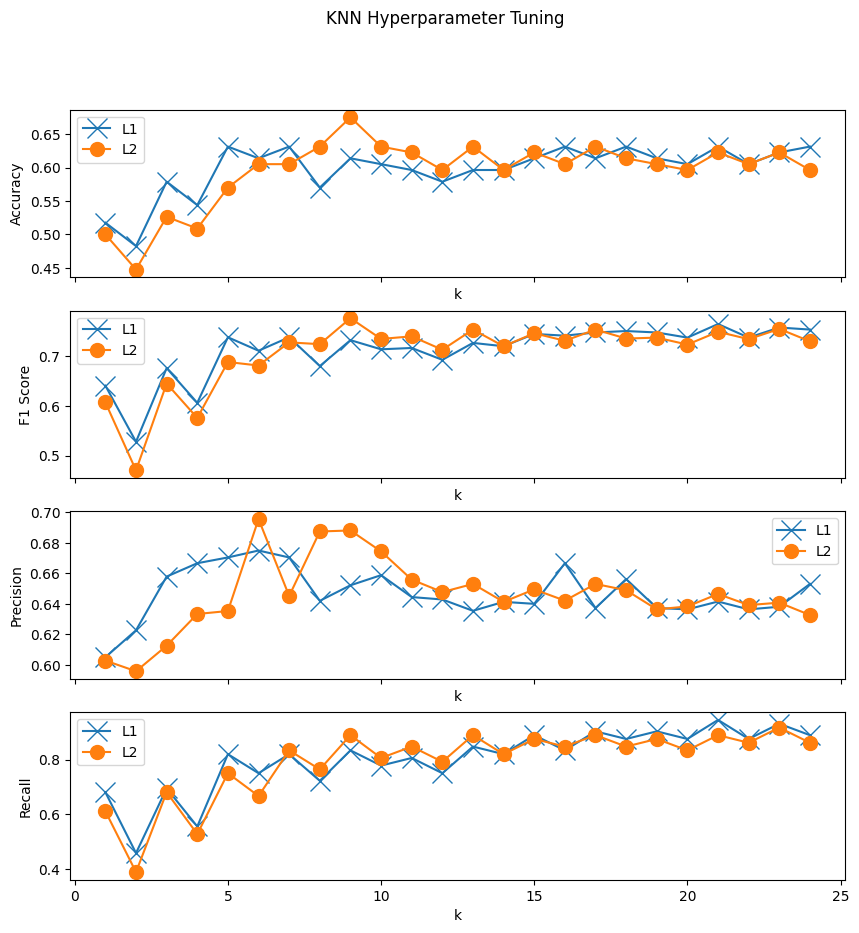

In [33]:

# graph evolution of performance metrics with respect to increasing k
# top-to-bottom: accuracy, f1, precision, recall
fig, axs = plt.subplots(4, 1, sharex=True)
fig.suptitle("KNN Hyperparameter Tuning")
# make larger graph
fig.set_size_inches(10, 10)
for i, metric in enumerate(["Accuracy", "F1 Score", "Precision", "Recall"]):
    for p in p_range:
        metric_values = [knn_evals[p][k][metric] for k in k_range]
        if p == 1:
            axs[i].plot(k_range, metric_values, label=f"L{p}", marker='x', markersize=14)
        elif p == 2:
            axs[i].plot(k_range, metric_values, label=f"L{p}", marker='o', markersize=10)
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel("k")
    axs[i].legend()

In [34]:
# retrieve confusion matrix for KNN
### CHANGE VALUES HERE ###
k = 1 # nearest neighbors parameter, choose from 1 to 24
p = 1 # distance metric, choose 1 or 2
##########################
confusion_matrix = knn_evals[k][p]["Confusion Matrix"]
print(f"Confusion Matrix for KNN with k={k} and p={p}:")
print(confusion_matrix)

Confusion Matrix for KNN with k=1 and p=1:
[[10 32]
 [23 49]]


## Evaluation of DT

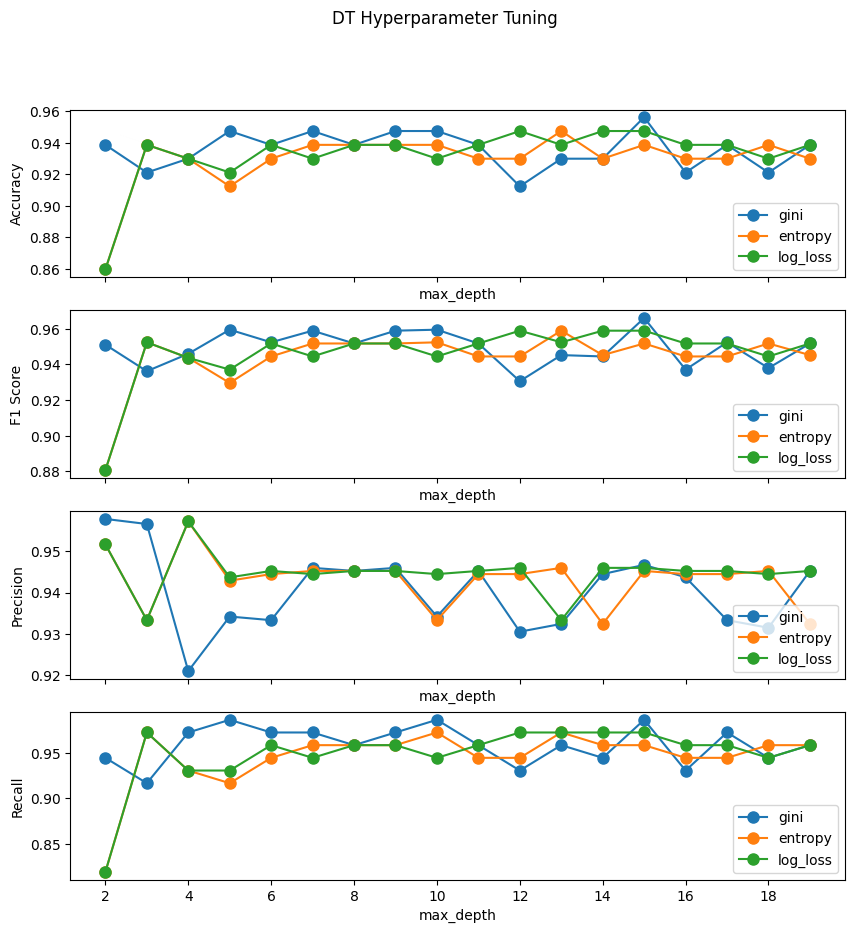

In [35]:
# DT hyperparameter tuning
dt_evals = {} # empty dict to store data
max_depth_range = range(2, 20)
criterion_range = ['gini', 'entropy', 'log_loss']

for criterion in criterion_range:
    dt_evals[criterion] = {}
    for max_depth in max_depth_range:
        model = tree.DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        dt_evals[criterion][max_depth] = evaluation(y_test, y_predict)

# graph evolution of performance metrics with respect to increasing max_depth
# top-to-bottom: accuracy, f1, precision, recall
fig, axs = plt.subplots(4, 1, sharex=True)
fig.suptitle("DT Hyperparameter Tuning")
fig.set_size_inches(10, 10) # larger graph
for i, metric in enumerate(["Accuracy", "F1 Score", "Precision", "Recall"]):
    for criterion in criterion_range:
        metric_values = [dt_evals[criterion][max_depth][metric] for max_depth in max_depth_range]
        axs[i].plot(max_depth_range, metric_values, label=f"{criterion}", marker='o', markersize=8)
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel("max_depth")
    axs[i].legend()
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True)) # only show integer values on x-axis


In [36]:
# retrieve confusion matrix for DT
### CHANGE VALUES HERE ###
max_depth = 2 # maximum depth of tree, choose from 2 to 19
criterion = 'gini' # impurity criterion, choose from 'gini', 'entropy', 'log_loss'
##########################
confusion_matrix = dt_evals[criterion][max_depth]["Confusion Matrix"]
print(f"Confusion Matrix for DT with max_depth={max_depth} and criterion={criterion}:")
print(confusion_matrix)

Confusion Matrix for DT with max_depth=2 and criterion=gini:
[[39  3]
 [ 4 68]]


## Evaluation of RF

In [37]:
# RF hyperparameter tuning, data collection
rf_evals = {} # empty dict to store data
n_estimators_range = [10, 50, 100]
min_samples_split_range = range(2,10)

for n_estimators in n_estimators_range:
    rf_evals[n_estimators] = {}
    for min_samples_split in min_samples_split_range:
        model = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split)
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        rf_evals[n_estimators][min_samples_split] = evaluation(y_test, y_predict)


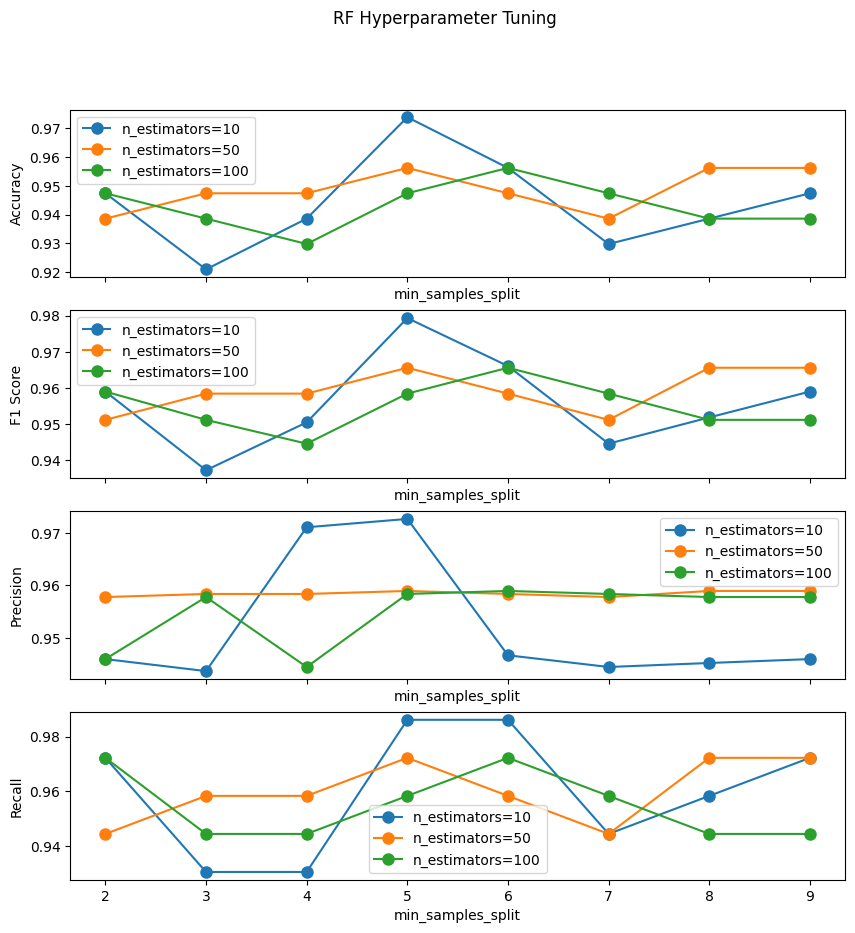

In [38]:
# graph evolution of performance metrics with respect to increasing min_samples_split
# top-to-bottom: accuracy, f1, precision, recall
# first subplot: gini criterion
fig, axs = plt.subplots(4, 1, sharex=True)
fig.suptitle("RF Hyperparameter Tuning")
fig.set_size_inches(10, 10) # larger graph
for i, metric in enumerate(["Accuracy", "F1 Score", "Precision", "Recall"]):
    for n_estimators in n_estimators_range:
        metric_values = [rf_evals[n_estimators][min_samples_split][metric] for min_samples_split in min_samples_split_range]
        axs[i].plot(min_samples_split_range, metric_values, label=f"n_estimators={n_estimators}", marker='o', markersize=8)
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel("min_samples_split")
    axs[i].legend()

    axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True)) # only show integer values on x-axis

In [39]:
# retrieve confusion matrix for RF
### CHANGE VALUES HERE ###
n_estimators = 10 # number of trees, choose from 10, 50, 100
min_samples_split = 2 # minimum samples required to split node, choose from 2 to 9
##########################
confusion_matrix = rf_evals[n_estimators][min_samples_split]["Confusion Matrix"]
print(f"Confusion Matrix for RF with n_estimators={n_estimators} and min_samples_split={min_samples_split}:")
print(confusion_matrix)

Confusion Matrix for RF with n_estimators=10 and min_samples_split=2:
[[38  4]
 [ 2 70]]


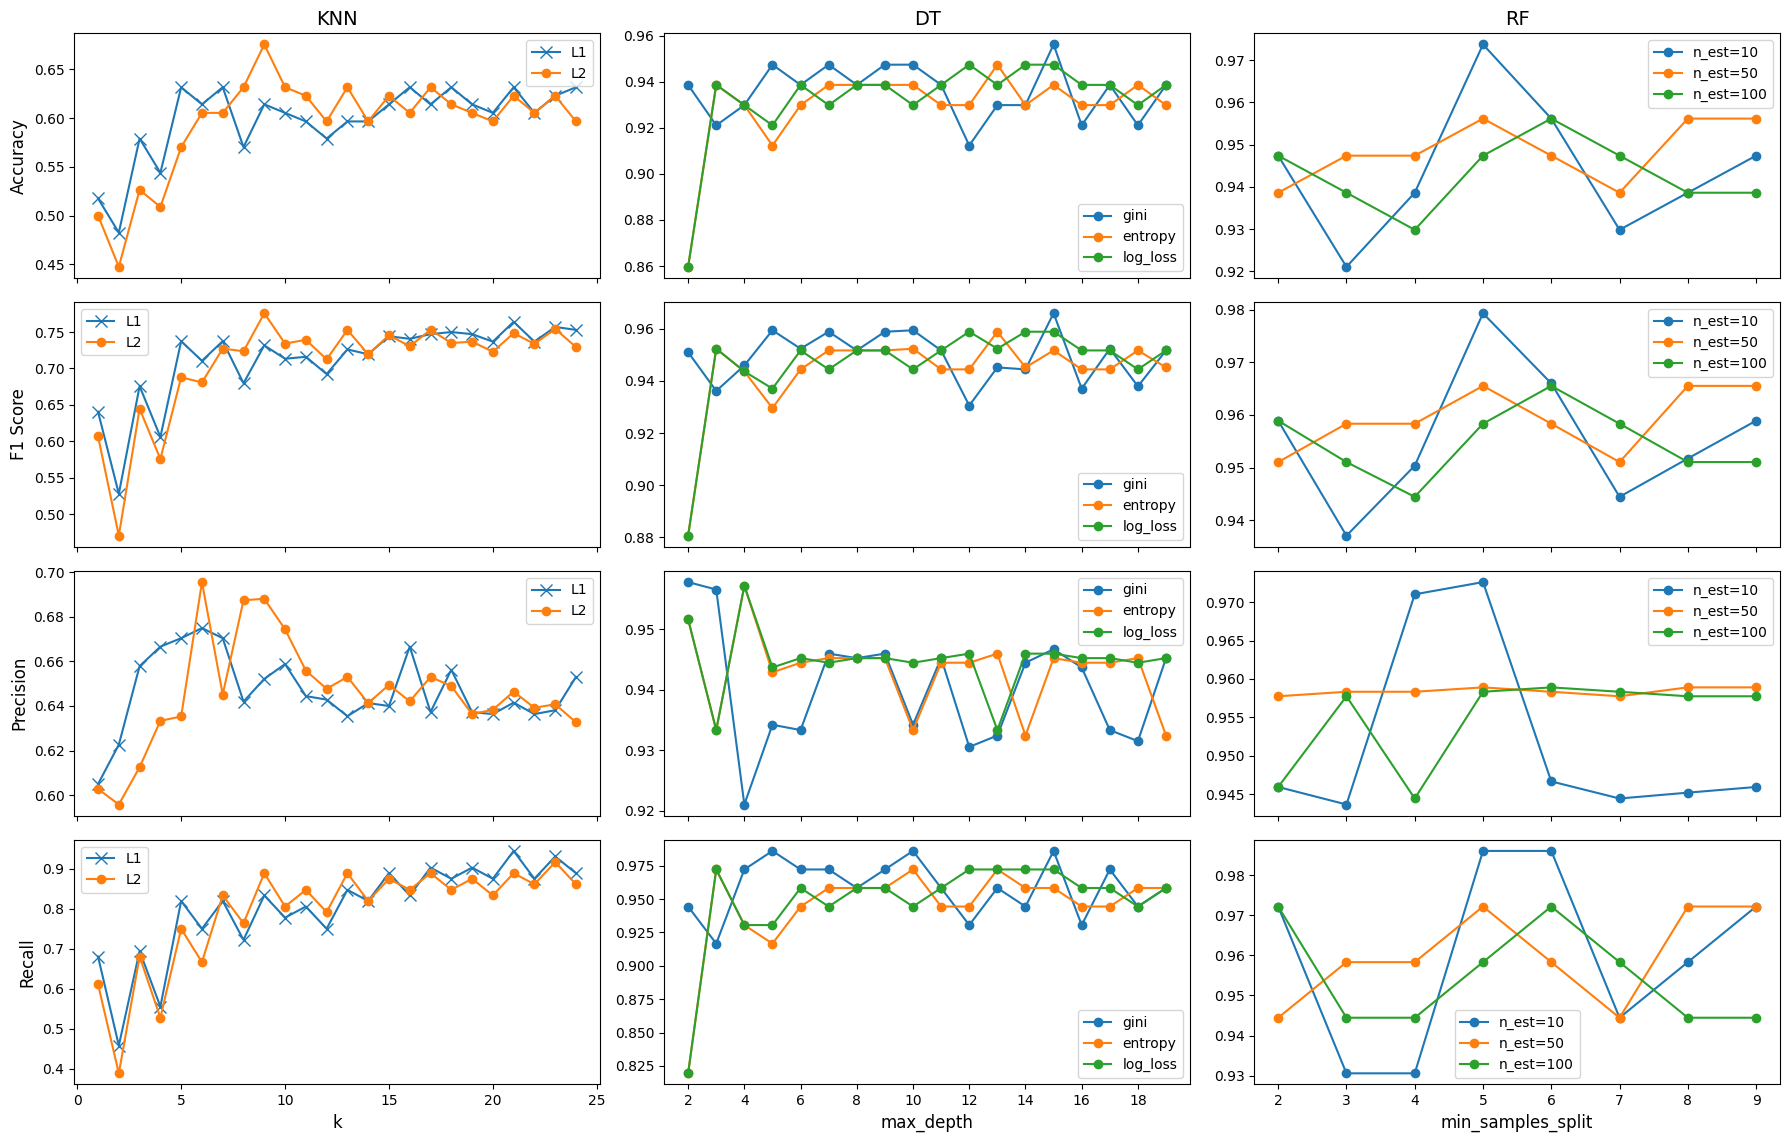

In [40]:
# Create a combined plot showing all models side by side
fig, axs = plt.subplots(4, 3, figsize=(18, 12), sharex='col')

# Column titles for each model
col_titles = ["KNN", "DT", "RF"]
for i, title in enumerate(col_titles):
    axs[0, i].set_title(title, fontsize=14)

# Row labels for metrics
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
for i, metric in enumerate(metrics):
    axs[i, 0].set_ylabel(metric, fontsize=12)

# Plot KNN (first column)
for i, metric in enumerate(metrics):
    for p in p_range:
        metric_values = [knn_evals[p][k][metric] for k in k_range]
        if p == 1:
            axs[i, 0].plot(k_range, metric_values, label=f"L{p}", marker='x', markersize=8)
        elif p == 2:
            axs[i, 0].plot(k_range, metric_values, label=f"L{p}", marker='o', markersize=6)
    axs[i, 0].legend()
    axs[3, 0].set_xlabel("k", fontsize=12)

# Plot DT (second column)
for i, metric in enumerate(metrics):
    for criterion in criterion_range:
        metric_values = [dt_evals[criterion][max_depth][metric] for max_depth in max_depth_range]
        axs[i, 1].plot(max_depth_range, metric_values, label=f"{criterion}", marker='o', markersize=6)
    axs[i, 1].legend()
    axs[i, 1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[3, 1].set_xlabel("max_depth", fontsize=12)

# Plot RF (third column)
for i, metric in enumerate(metrics):
    for n_estimators in n_estimators_range:
        metric_values = [rf_evals[n_estimators][min_samples_split][metric] 
                        for min_samples_split in min_samples_split_range]
        axs[i, 2].plot(min_samples_split_range, metric_values, 
                      label=f"n_est={n_estimators}", marker='o', markersize=6)
    axs[i, 2].legend()
    axs[i, 2].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[3, 2].set_xlabel("min_samples_split", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.savefig("model_ablation_performance.png")
plt.show()